In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR

In [67]:
gold_data = pd.read_csv(r"C:\Users\vrehm\OneDrive\Desktop\btech project\golddataset.csv", na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [68]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [69]:
gold_data.tail()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [70]:
gold_data.shape

(1718, 80)

In [71]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


Features

Gold ETF :- Date, Open, High, Low, Close and Volume.
S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume'
Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume'
Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend'
Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend'
Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend'
Rhodium Prices :- 'RHO_PRICE'
US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend'
Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume'
Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

Target Variable

Gold ETF :- Adjusted Close

checking missing values

In [72]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

In [73]:
gold_data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Adj Close        0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 80, dtype: int64

In [74]:
gold_data.nunique()

Open             1363
High             1368
Low              1356
Close            1384
Adj Close        1384
                 ... 
USO_High         1102
USO_Low          1124
USO_Close        1128
USO_Adj Close    1128
USO_Volume       1716
Length: 80, dtype: int64

In [75]:
round((gold_data.isnull().sum()/len(gold_data)*100),2)

Open             0.0
High             0.0
Low              0.0
Close            0.0
Adj Close        0.0
                ... 
USO_High         0.0
USO_Low          0.0
USO_Close        0.0
USO_Adj Close    0.0
USO_Volume       0.0
Length: 80, dtype: float64

effect of index prices on gold rates

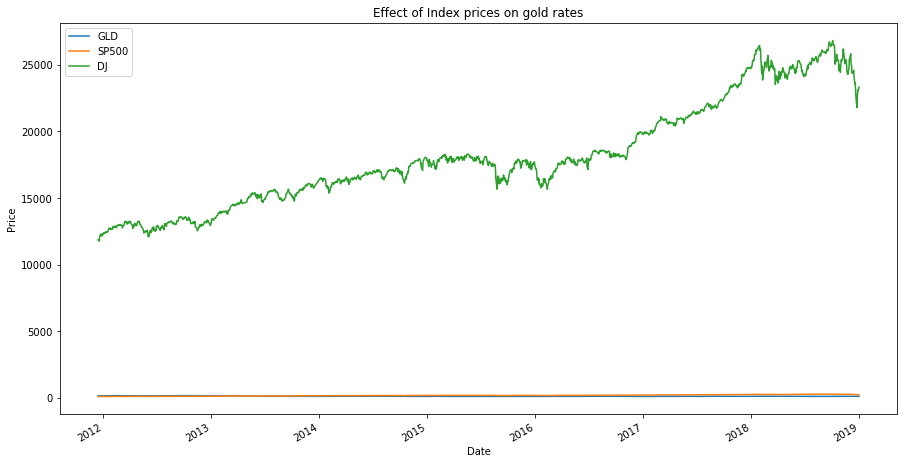

In [76]:
GLD_adj_close = gold_data['Adj Close']
SP_adj_close = gold_data['SP_Ajclose']
DJ_adj_close  = gold_data['DJ_Ajclose']

price = pd.DataFrame({'GLD':GLD_adj_close, 'SP500':SP_adj_close, 'DJ':DJ_adj_close})

graph = price.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

graph.set_ylabel('Price')
graph.legend(loc='upper left')
plt.show()

daily returns of all features

In [77]:
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

In [78]:
GLD_adj_close = gold_data['Adj Close']    #gold price
SP_adj_close = gold_data['SP_Ajclose']   #S&P 500 index
DJ_adj_close  = gold_data['DJ_Ajclose']   #dow jones index
EG_adj_close =  gold_data['EG_Ajclose']   #eldorado gold corp
USO_Adj_close = gold_data['USO_Adj Close']   #Oil ETF USO
GDX_Adj_close = gold_data['GDX_Adj Close']   #Gold Miners ETF
EU_price      = gold_data['EU_Price']      #eur usd exc rate
OF_price      = gold_data['OF_Price']      #Brent Crude oil Futures
OS_price      = gold_data['OS_Price']      #Crude Oil WTI USD
SF_price      = gold_data['SF_Price']      #Silver Futures
USB_price      = gold_data['USB_Price']    # US Bond Rate data
PLT_price      = gold_data['PLT_Price']    #Platinum Price
PLD_price      = gold_data['PLD_Price']    #Palladium price
rho_price      = gold_data['RHO_PRICE']    #Rhodium Prices
usdi_price      = gold_data['USDI_Price']   #US dollar Index Price

GLD_daily_return = compute_daily_returns(GLD_adj_close)
SP_daily_return = compute_daily_returns(SP_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

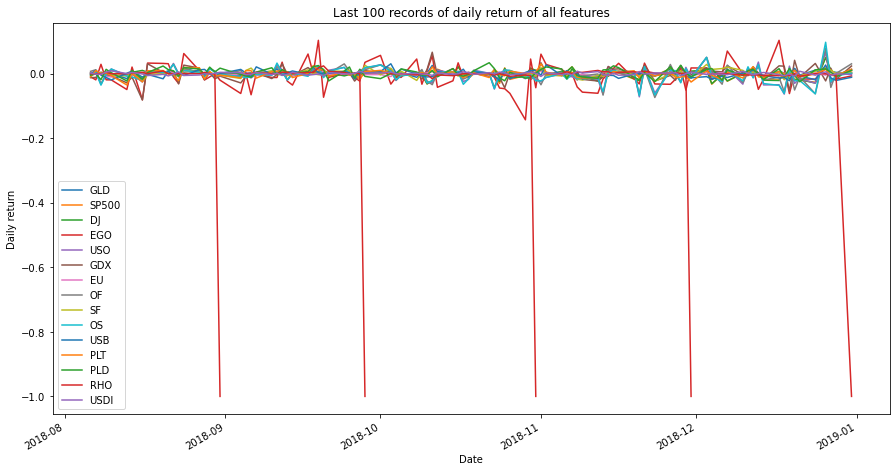

In [79]:

return_data = pd.DataFrame({'GLD':GLD_daily_return, 'SP500':SP_daily_return, 'DJ':DJ_adj_return, 'EGO':EG_adj_return, 'USO':USO_Adj_return,
                     'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                     'RHO':rho_price,'USDI':USDI_price})

return_graph = return_data[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

return_graph.set_ylabel('Daily return')
return_graph.legend(loc='lower left')
plt.show()

daily return of stock indexes

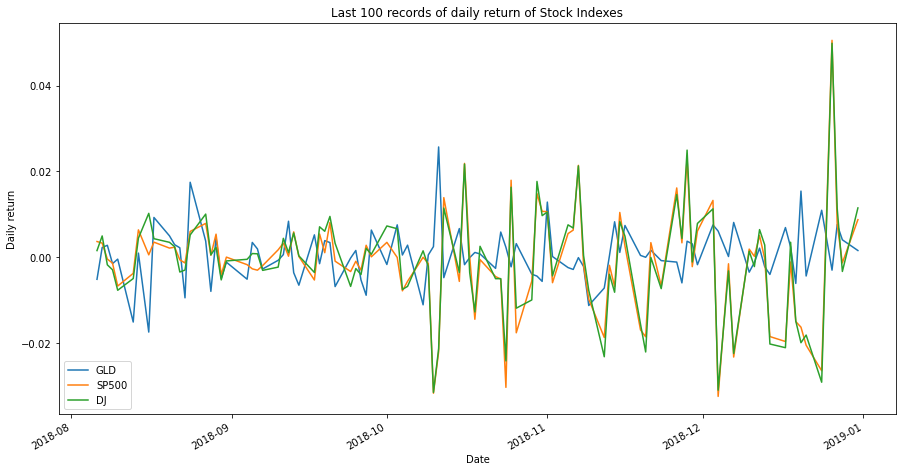

In [80]:
stock_data = pd.DataFrame({'GLD':GLD_daily_return, 'SP500':SP_daily_return, 'DJ':DJ_adj_return})

stock_return = stock_data[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

stock_return.set_ylabel('Daily return')
stock_return.legend(loc='lower left')
plt.show()

scatterplot

<AxesSubplot:xlabel='SP500', ylabel='GLD'>

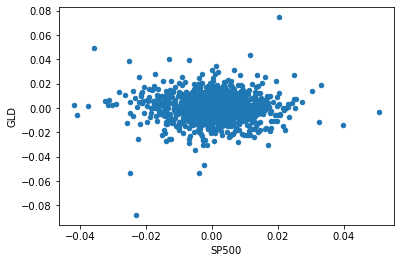

In [81]:
return_data.plot(kind='scatter', x='SP500', y='GLD')

<AxesSubplot:xlabel='DJ', ylabel='GLD'>

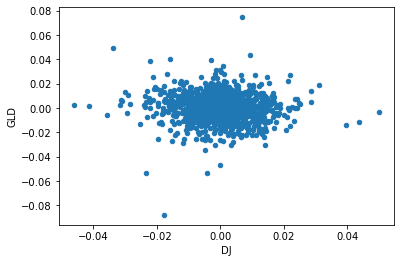

In [82]:
return_data.plot(kind='scatter', x='DJ', y='GLD')

<AxesSubplot:xlabel='EGO', ylabel='GLD'>

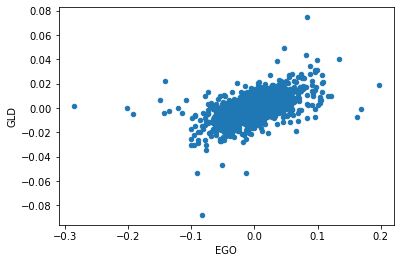

In [83]:
return_data.plot(kind='scatter', x='EGO', y='GLD')

<AxesSubplot:xlabel='USO', ylabel='GLD'>

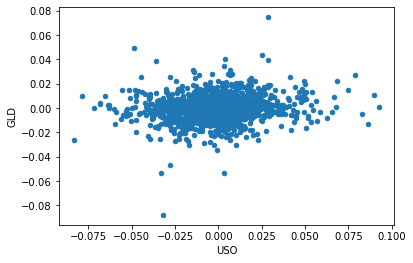

In [84]:
return_data.plot(kind='scatter', x='USO', y='GLD')

<AxesSubplot:xlabel='USB', ylabel='GLD'>

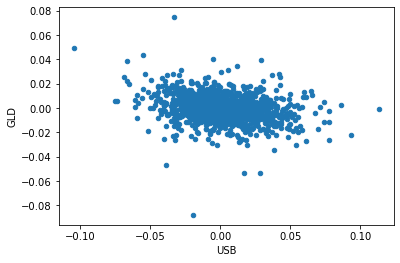

In [85]:
return_data.plot(kind='scatter', x='USB', y='GLD')

<AxesSubplot:xlabel='EU', ylabel='GLD'>

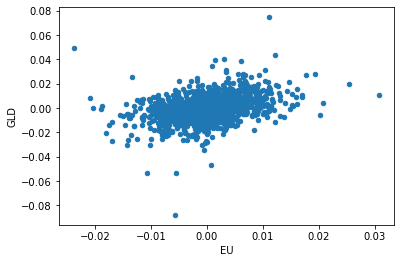

In [86]:
return_data.plot(kind='scatter', x='EU', y='GLD')

<AxesSubplot:xlabel='PLT', ylabel='GLD'>

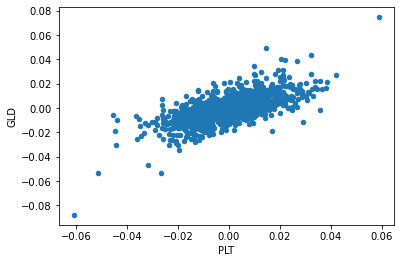

In [87]:
return_data.plot(kind='scatter', x='PLT', y='GLD')

<AxesSubplot:xlabel='PLD', ylabel='GLD'>

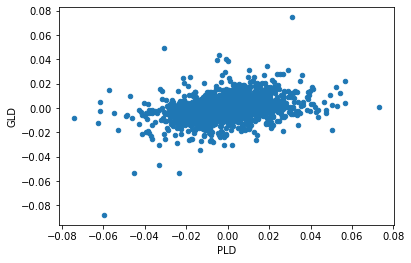

In [88]:
return_data.plot(kind='scatter', x='PLD', y='GLD')

calculating mean, standard deviation, kurtosis

In [121]:
def index_graph(index):
    mean=return_data[index].mean()           # computing mean of Gold stock
    std=return_data[index].std()             # computing standard deviation of Gold stock
    kurt=return_data[index].kurtosis()       # computing kurtosis of Gold stock
    print('Mean=',mean)
    print('Standard Deviation=',std)
    print('Kurtosis=',kurt)

    return_data[index].hist(bins=20)         #Plotting Histogram

    plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
    plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
    plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
    plt.title("Plotting of Mean, Standard deviation and Kurtosis of {} Prices".format(index))
    plt.show()

Mean= -8.65698612128203e-05
Standard Deviation= 0.00961153616700639
Kurtosis= 8.606584924918355


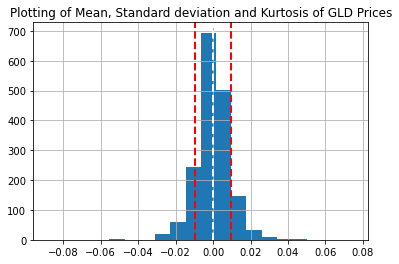

Mean= 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


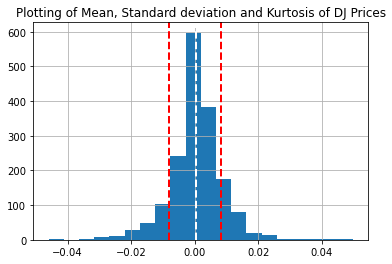

Mean= -0.0011590318309980111
Standard Deviation= 0.03722617022946967
Kurtosis= 4.124870221436676


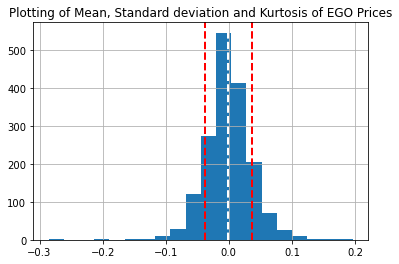

Mean= 0.0005366024364688838
Standard Deviation= 0.008262309911393526
Kurtosis= 3.4557859039745233


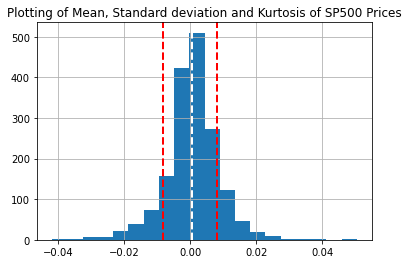

In [129]:
index_graph('GLD')
index_graph('DJ')
index_graph('EGO')
index_graph('SP500')


correlation analysis

In [93]:
correlation = gold_data.corr()

<AxesSubplot:>

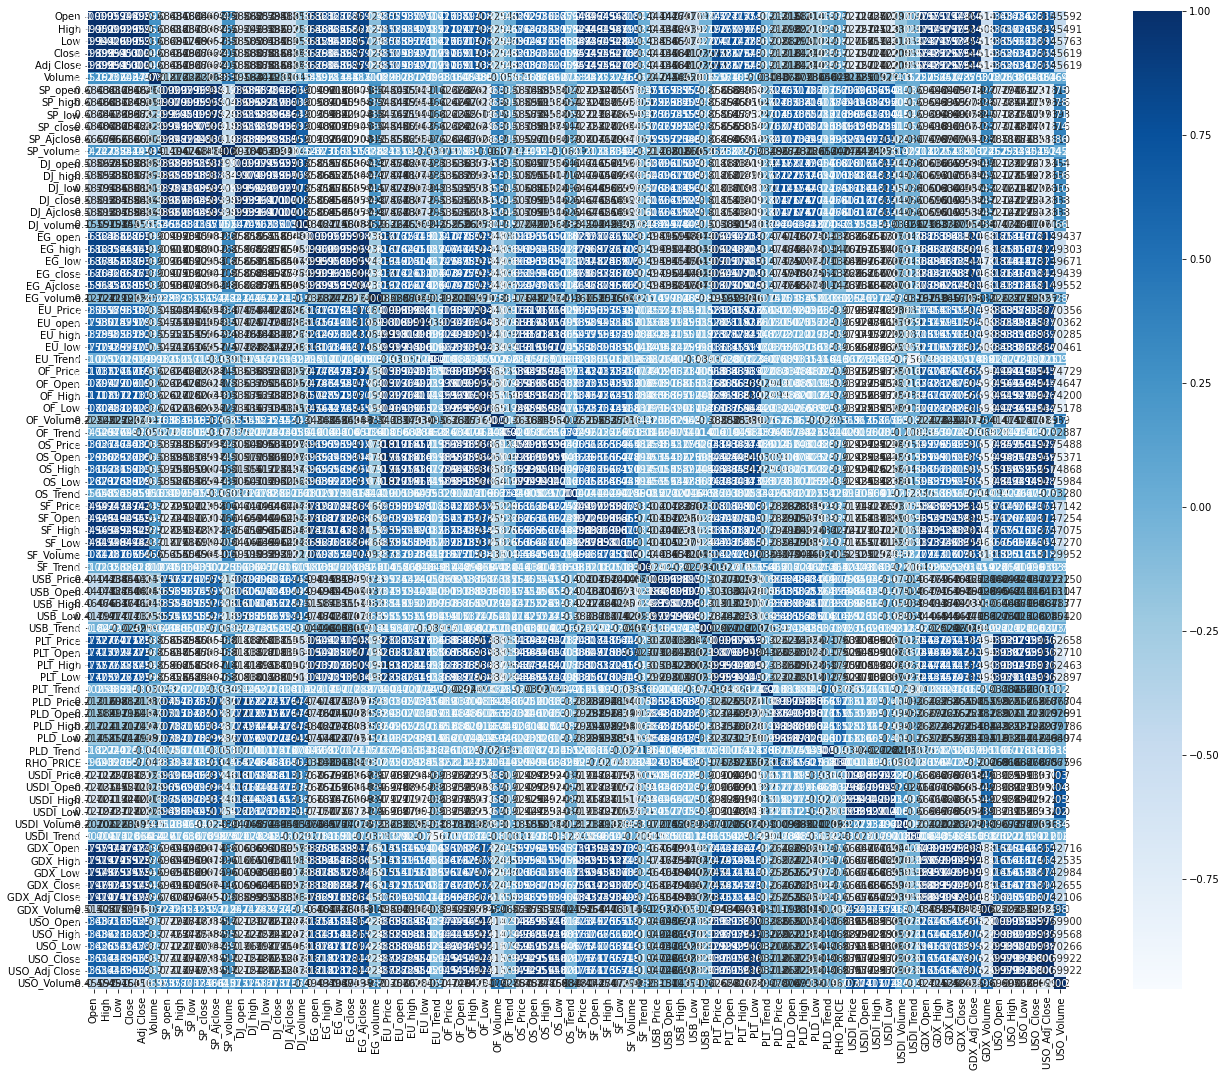

In [94]:
plt.figure(figsize = (24,18))
sns.heatmap(correlation, cbar = True, square = True, fmt='.5f', annot=True, annot_kws = {'size':10}, cmap='Blues')

In [95]:
X = gold_data.drop(['Adj Close'], axis=1)
X = X.drop(['Close'], axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

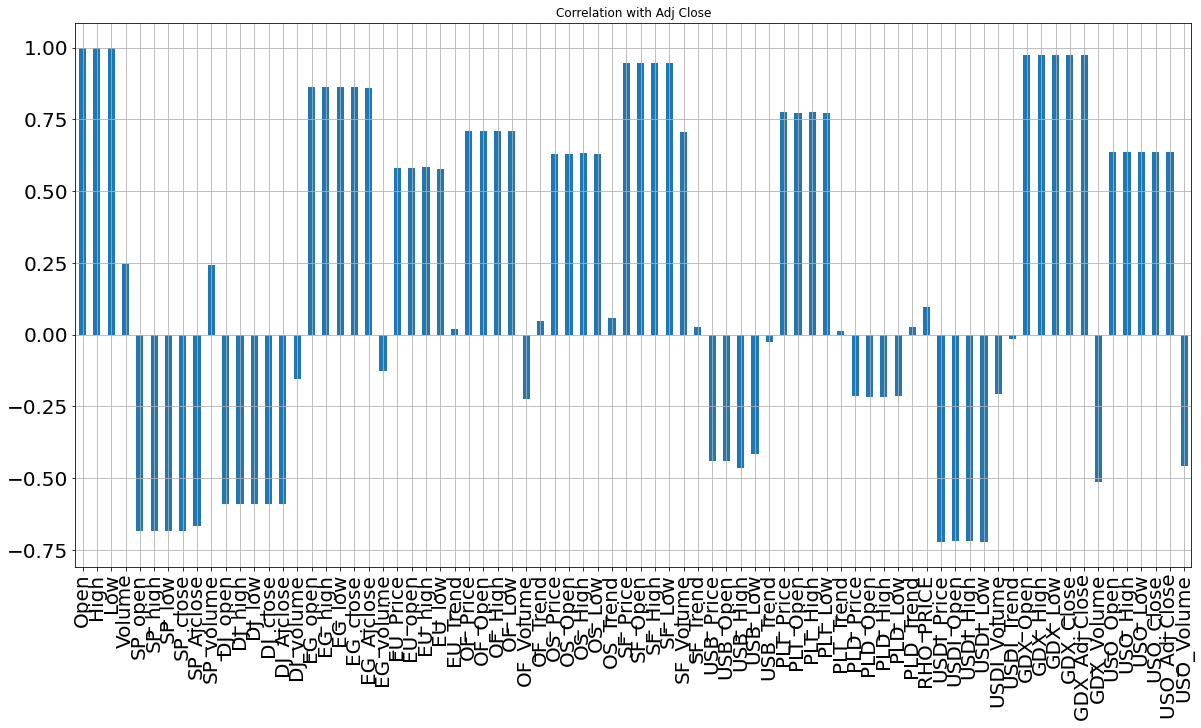

In [96]:
X.corrwith(gold_data['Adj Close']).plot.bar(figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20, rot = 90, grid = True)

In [97]:
coef=correlation["Adj Close"].sort_values(ascending=False)

positive correlation

In [98]:
pos_corr = coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

negative correlation

In [99]:
neg_corr = coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

using technical indicators for precise prediction (sma and stdev)

In [100]:
def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

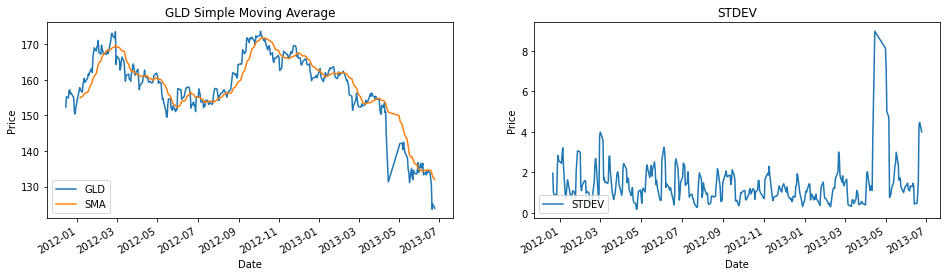

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Simple Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])

STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[1])

Open_Close=gold_data.Open - gold_data.Close

High_Low=gold_data.High-gold_data.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

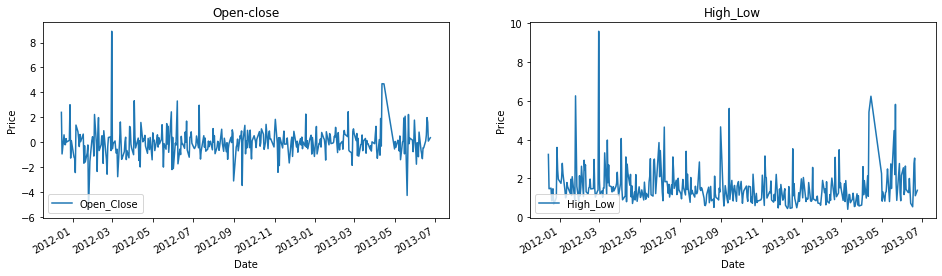

In [102]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=gold_data.Open - gold_data.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=gold_data.High-gold_data.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [103]:
test = gold_data
test['SMA'] = SMA_GLD
test['STDEV'] = STDEV
test['Open_Close'] = Open_Close
test['High_Low'] = High_Low

test = test[33:]       # Dropping first 33 records from the data as it has null values because of introduction of technical indicators

target_adj_close = pd.DataFrame(test['Adj Close'])

display(test.head())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SMA,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,134.449997,...,37.330002,37.529999,37.130001,37.330002,37.330002,6126100,165.198666,1.562107,-0.219986,1.069992
2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,134.789993,...,37.070000,38.080002,37.040001,37.950001,37.950001,10237000,165.894667,1.594111,-2.319992,2.940002
2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,135.190002,...,38.360001,38.439999,37.689999,38.040001,38.040001,9045800,166.428000,1.575718,0.759995,2.460007
2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,135.360001,...,38.389999,38.480000,38.150002,38.330002,38.330002,4663500,166.856000,0.965153,1.989991,2.699997
2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,134.360001,...,37.549999,38.020000,37.509998,38.020000,38.020000,6008600,167.250666,1.059963,-0.649994,1.309997


In [104]:
gold_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

segregate target (adj close of Gold ETF) and feature variable

In [105]:
#feature columns

feature_columns = ['Open', 'High', 'Low', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume',
       'SMA', 'STDEV', 'Open_Close', 'High_Low']

normalizing the data using sklearn's MinMaxScaler function

In [106]:
from sklearn.preprocessing import MinMaxScaler        #puts the data in a single range for better distribution
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SMA,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.038373,0.028113,0.166542,...,0.873594,0.860811,0.876004,0.862555,0.862555,0.046608,0.906189,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.040428,0.029765,0.224602,...,0.865897,0.876860,0.873327,0.880764,0.880764,0.084243,0.916193,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.042845,0.031707,0.232599,...,0.904085,0.887365,0.892655,0.883407,0.883407,0.073338,0.923859,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.043872,0.032533,0.251876,...,0.904973,0.888532,0.906334,0.891924,0.891924,0.033218,0.930011,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.037829,0.027676,0.292146,...,0.880107,0.875109,0.887303,0.882819,0.882819,0.045532,0.935684,0.111185,0.387428,0.117271


In [107]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value

target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set

validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SMA,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.038373,0.028113,0.166542,...,0.873594,0.860811,0.876004,0.862555,0.862555,0.046608,0.906189,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.040428,0.029765,0.224602,...,0.865897,0.876860,0.873327,0.880764,0.880764,0.084243,0.916193,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.042845,0.031707,0.232599,...,0.904085,0.887365,0.892655,0.883407,0.883407,0.073338,0.923859,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.043872,0.032533,0.251876,...,0.904973,0.888532,0.906334,0.891924,0.891924,0.033218,0.930011,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.037829,0.027676,0.292146,...,0.880107,0.875109,0.887303,0.882819,0.882819,0.045532,0.935684,0.111185,0.387428,0.117271


Shape of features :  (1685, 82)
Shape of target :  (1685, 1)


,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SMA,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,0.252767,0.249863,0.252304,0.131396,0.719499,0.732264,0.685249,0.680445,0.721173,0.474541,...,0.053286,0.051065,0.055605,0.047283,0.047283,0.346662,0.221370,0.071990,0.459268,0.050107
2018-12-24,0.258024,0.262042,0.266061,0.089215,0.672900,0.678571,0.650574,0.642011,0.685607,0.249183,...,0.049438,0.043478,0.047874,0.039060,0.039060,0.188254,0.225663,0.103731,0.400256,0.038380
2018-12-26,0.272551,0.273810,0.266061,0.138587,0.654321,0.710896,0.647477,0.713561,0.751818,0.397651,...,0.042333,0.055150,0.046387,0.056975,0.056975,0.365682,0.228778,0.105509,0.490699,0.130064
2018-12-27,0.271859,0.272441,0.273903,0.112378,0.694263,0.723668,0.679055,0.724982,0.762387,0.330444,...,0.052398,0.047272,0.050550,0.048752,0.048752,0.325400,0.232083,0.071859,0.429121,0.058636
2018-12-28,0.275042,0.274904,0.281882,0.058103,0.736686,0.742494,0.724540,0.723048,0.760598,0.261258,...,0.050918,0.047272,0.050847,0.046109,0.046109,0.199288,0.235840,0.092629,0.412444,0.015992


,Adj Close
Date,
2018-12-21,120.019997
2018-12-24,119.660004
2018-12-26,120.570000
2018-12-27,121.059998
2018-12-28,121.250000



 -----After process------ 

Shape of features :  (1595, 82)
Shape of target :  (1595, 1)


,Adj Close
Date,
2018-08-13,113.070000
2018-08-14,111.099998
2018-08-16,112.129997
2018-08-17,112.690002
2018-08-20,113.019997


Train Test Split     

In [108]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform.iloc[train_index, :], feature_minmax_transform.iloc[test_index,:]
        y_train, y_test = target_adj_close['Adj Close'].iloc[train_index], target_adj_close['Adj Close'].iloc[test_index]

In [109]:
X_train.shape

(1450, 82)

In [110]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [111]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -0.978 (0.094)


In [112]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  0.7416753511284392


In [113]:
model.score(X_test, y_test)

0.954812159977493

In [114]:
model.score(X_train, y_train)

0.9994709742475137

In [115]:
result = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
result

,Actual Price,Predicted Price
Date,,
2018-01-22,127.279999,126.233279
2018-01-23,128.830002,127.176815
2018-01-24,127.970001,128.502154
2018-01-25,127.349998,128.228362
2018-01-29,126.800003,127.394484
...,...,...
2018-08-13,113.070000,113.948271
2018-08-14,111.099998,113.357964
2018-08-16,112.129997,112.297590


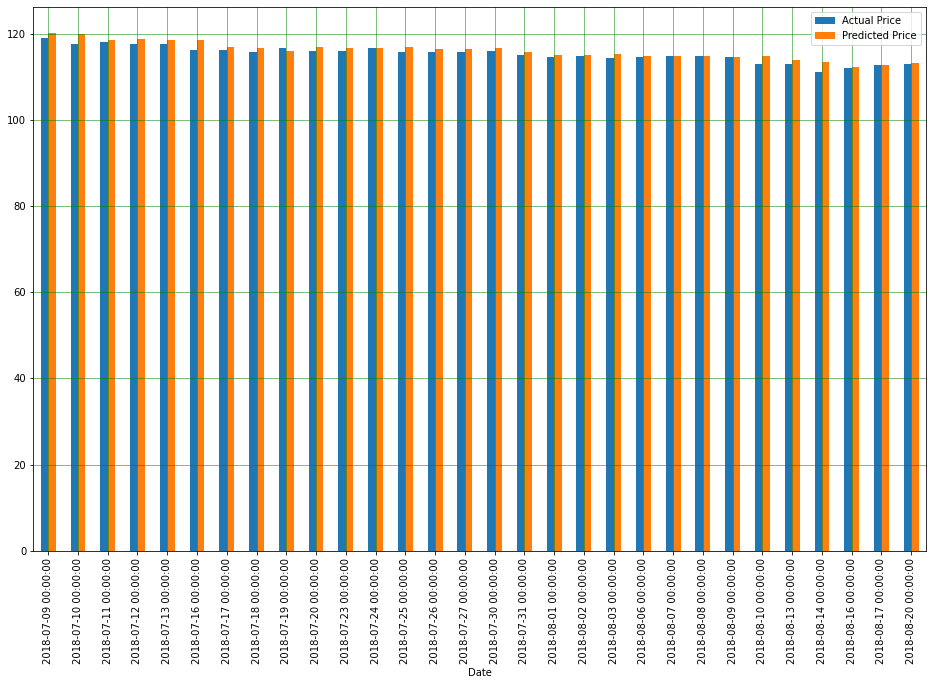

In [116]:
result_plot = result.tail(30)
result_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Exporting the model

In [117]:
import pickle
pickle.dump(gold_data,open('gold_price.pkl','wb'))
pickle.dump(result,open('predict.pkl','wb'))


In [118]:
result.head()

,Actual Price,Predicted Price
Date,,
2018-01-22,127.279999,126.233279
2018-01-23,128.830002,127.176815
2018-01-24,127.970001,128.502154
2018-01-25,127.349998,128.228362
2018-01-29,126.800003,127.394484


In [119]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,SMA,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,NaN,NaN,2.410003,3.239990
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,NaN,NaN,-0.919998,1.470001
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,NaN,NaN,0.610001,1.500000
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,NaN,NaN,-0.159989,0.849991
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,NaN,1.955231,-0.180008,1.399994


In [120]:
Gold_ETF = gold_data['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
SP_500_Index = gold_data['SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume']
Dow_Jones_Index = gold_data['DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume']
Eldorado_Gold_Corporation = gold_data['EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume']
EURO_USD_Exchange_Rate = gold_data['EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend']
Brent_Crude_Oil_Futures = gold_data['OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend']
Crude_Oil_WTI_USD = gold_data['OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend']
Silver_Futures = gold_data['SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend']
US_Bond_Rate  = gold_data['USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend']
Platinum_Price = gold_data['PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend']
Palladium_Price = gold_data['PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend']
Rhodium_Prices = gold_data['RHO_PRICE']
US_Dollar_Index = gold_data['USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend']
Gold_Miners_ETF = gold_data['GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume']
Oil_ETF_USO = gold_data['USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume']

KeyError: ('SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume')